In [11]:
import pandas as pd

claude_aae = pd.read_csv('./Complete Dataset/Claude-Haiku-AAE-sentiment.csv')
claude_sae = pd.read_csv('./Complete Dataset/Claude-Haiku-SAE-sentiment.csv')
claude_aae_from_sae = pd.read_csv('./Complete Dataset/Claude-Haiku-AAE_from_SAE-sentiment.csv')


gpt_aae = pd.read_csv('./Complete Dataset/GPT-4o-mini-AAE-sentiment.csv')
gpt_sae = pd.read_csv('./Complete Dataset/GPT-4o-mini-SAE-sentiment.csv')
gpt_aae_from_sae = pd.read_csv('./Complete Dataset/GPT-4o-mini-AAE_from_SAE-sentiment.csv')

phi_aae = pd.read_csv('./Complete Dataset/Phi-3-medium-AAE-sentiment.csv')
phi_sae = pd.read_csv('./Complete Dataset/Phi-3-medium-SAE-sentiment.csv')
phi_aae_from_sae = pd.read_csv('./Complete Dataset/Phi-3-medium-AAE_from_SAE-sentiment.csv')


llama_aae = pd.read_csv(f'./seperate models/some-removed/Llama3.1-8b-AAE-sentiment.csv')
llama_sae = pd.read_csv(f'./seperate models/some-removed/Llama-3.1-SAE-sentiment.csv')
llama_aae_from_sae = pd.read_csv(f'./seperate models/some-removed/Llama3.1-8b-AAE_from_SAE-sentiment.csv')

mistral_aae = pd.read_csv(f'./seperate models/some-removed/Mistral-AAE-Labels.csv')
mistral_sae = pd.read_csv(f'./seperate models/some-removed/Mistral-SAE-sentiment.csv')
mistral_aae_from_sae = pd.read_csv(f'./seperate models/some-removed/Mistral-AAE_from_SAE-sentiment.csv')


## Dialictic Group Invariance Metric

We introduce a new metric termed Dialictic Group Invariance Metric, where we requires the response from an LLM model be identical under semantically identical but dialectly different input.

$$DGIM = \frac{1}{N}\sum^{N}_{i=1}\mathbb{1}( f(x^{i}_{AAE})  = f(x^{i}_{SAE}))$$

In [3]:
print(claude_aae.columns)
print(claude_sae.columns)

print(gpt_aae.columns)
print(gpt_sae.columns)

print(phi_aae.columns)
print(phi_sae.columns)

print(llama_aae.columns)
print(llama_sae.columns)

print(mistral_aae.columns)
print(mistral_sae.columns)

Index(['text', 'sentiment'], dtype='object')
Index(['standard_american_english', 'sae_labels'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['standard_american_english', 'sae_labels'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['standard_american_english', 'sae_labels'], dtype='object')
Index(['Unnamed: 0', 'text', 'sentiment'], dtype='object')
Index(['standard_american_english', 'sae_labels'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['standard_american_english', 'sae_labels'], dtype='object')


In [9]:
print(mistral_aae_from_sae.columns)

Index(['AAE_from_SAE', 'AAE_from_SAE-sentiment'], dtype='object')


DGIM for Claude 3 Haiku: 0.76
DGIM for gpt-4o-mini: 0.79
DGIM for Phi-3-Medium: 0.78
DGIM for LLama 3.1 8B: 0.80
DGIM for Mistral 7B 0.3: 0.75


/local/home/furquanh/tmp/ipykernel_1427778/1002433204.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='DGIM', data=dgim_df, palette='Set2')


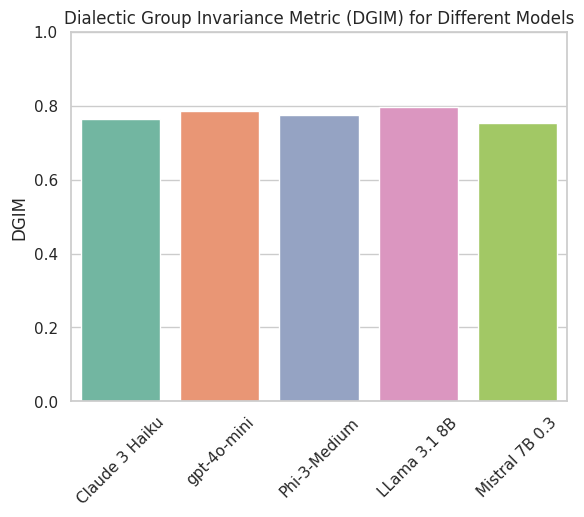

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the datasets are already loaded into DataFrames:
# claude_aae, claude_sae, gpt_aae, gpt_sae, phi_aae, phi_sae, llama_aae, llama_sae, mistral_aae, mistral_sae

# List of model names
models = ['claude', 'gpt', 'phi', 'llama', 'mistral']

# Mapping of model names to the desired labels
model_labels = {
    'claude': 'Claude 3 Haiku',
    'gpt': 'gpt-4o-mini',
    'phi': 'Phi-3-Medium',
    'llama': 'LLama 3.1 8B',
    'mistral': 'Mistral 7B 0.3'
}

# Initialize a dictionary to store DGIM scores
dgim_scores = {}

# Function to standardize sentiment labels
def standardize_label(label):
    label = str(label).lower()
    if label in ['positive', 'pos', '1', '1.0']:
        return 'positive'
    elif label in ['negative', 'neg', '-1', '-1.0']:
        return 'negative'
    elif label in ['neutral', 'neu', '0', '0.0']:
        return 'neutral'
    else:
        return label  # Return as is if not matched

for model in models:
    # Get the AAE and SAE DataFrames for the model
    aae_df = globals()[f'{model}_aae']
    sae_df = globals()[f'{model}_sae']
    
    # Reset indices to ensure alignment
    aae_df = aae_df.reset_index(drop=True)
    sae_df = sae_df.reset_index(drop=True)
    
    # Ensure that the number of rows match
    if len(aae_df) != len(sae_df):
        print(f"Number of rows do not match for model {model}")
        min_len = min(len(aae_df), len(sae_df))
        aae_df = aae_df.iloc[:min_len]
        sae_df = sae_df.iloc[:min_len]

    # Extract the sentiment labels
    # For AAE, the column is 'sentiment'
    # For SAE, the column is 'sae_labels'
    if 'sentiment' not in aae_df.columns:
        print(f"'sentiment' column not found in {model}_aae")
        continue
    if 'sae_labels' not in sae_df.columns:
        print(f"'sae_labels' column not found in {model}_sae")
        continue

    aae_sentiments = aae_df['sentiment']
    sae_sentiments = sae_df['sae_labels']

    # Convert labels to standard labels
    aae_sentiments = aae_sentiments.apply(standardize_label)
    sae_sentiments = sae_sentiments.apply(standardize_label)

    # Combine into a DataFrame and drop NaNs
    sentiments_df = pd.DataFrame({
        'aae_sentiment': aae_sentiments, 
        'sae_sentiment': sae_sentiments
    }).dropna()

    total_samples = len(sentiments_df)
    if total_samples == 0:
        print(f"No valid sentiment pairs for model {model}")
        continue

    # Update sentiments after dropping NaNs
    aae_sentiments = sentiments_df['aae_sentiment']
    sae_sentiments = sentiments_df['sae_sentiment']

    # Calculate the number of exact matches
    num_matches = (aae_sentiments == sae_sentiments).sum()
    dgim = num_matches / total_samples

    # Store the DGIM for the model with the new label
    model_label = model_labels.get(model, model.capitalize())
    dgim_scores[model_label] = dgim

    print(f"DGIM for {model_label}: {dgim:.2f}")

# Create a DataFrame for plotting
dgim_df = pd.DataFrame(list(dgim_scores.items()), columns=['Model', 'DGIM'])

# Plot the bar plot using seaborn
sns.set_theme(style="whitegrid")
sns.barplot(x='Model', y='DGIM', data=dgim_df, palette='Set2')

plt.title('Dialectic Group Invariance Metric (DGIM) for Different Models')
plt.ylabel('DGIM')
plt.ylim(0, 1)  # Since DGIM is a proportion between 0 and 1
plt.xlabel('')  # Optionally remove x-axis label if desired
plt.xticks(rotation=45)  # Rotate x-labels if they are too long

plt.show()

## Now we will investigate why we failed to achieve a DGIM score of 1?


Processing model: Claude 3 Haiku

Processing model: GPT-4o-mini

Processing model: LLama 3.1 8B


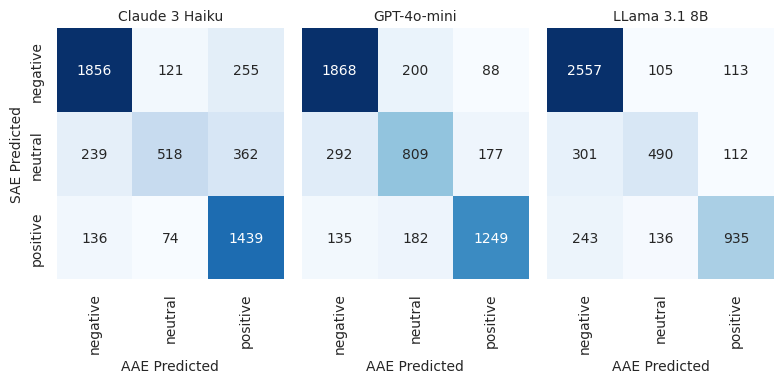

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Mapping of model names to the desired labels
model_labels = {
    'claude': 'Claude 3 Haiku',
    'gpt': 'GPT-4o-mini',
    'llama': 'LLama 3.1 8B'
}

# Function to standardize sentiment labels
def standardize_label(label):
    label = str(label).lower()
    if label in ['positive', 'pos', '1', '1.0']:
        return 'positive'
    elif label in ['negative', 'neg', '-1', '-1.0']:
        return 'negative'
    elif label in ['neutral', 'neu', '0', '0.0']:
        return 'neutral'
    else:
        return label  # Return as is if not matched

# List of models to plot
models_to_plot = ['claude', 'gpt', 'llama']

# Create subplots
fig, axes = plt.subplots(1, len(models_to_plot), figsize=(8, 4))  # Adjust figsize as needed
labels = ['negative', 'neutral', 'positive']

for idx, model in enumerate(models_to_plot):
    print(f"\nProcessing model: {model_labels.get(model, model.capitalize())}")
    
    # Get the AAE and SAE DataFrames for the model
    try:
        aae_df = globals()[f'{model}_aae']
        sae_df = globals()[f'{model}_sae']
    except KeyError as e:
        print(f"DataFrame for model {model} not found: {e}")
        continue
    
    # Reset indices to ensure alignment
    aae_df = aae_df.reset_index(drop=True)
    sae_df = sae_df.reset_index(drop=True)
    
    # Ensure that the number of rows match
    if len(aae_df) != len(sae_df):
        print(f"Number of rows do not match for model {model}")
        min_len = min(len(aae_df), len(sae_df))
        aae_df = aae_df.iloc[:min_len]
        sae_df = sae_df.iloc[:min_len]
    
    # Extract the sentiment labels
    if 'sentiment' not in aae_df.columns:
        print(f"'sentiment' column not found in {model}_aae")
        continue
    if 'sae_labels' not in sae_df.columns:
        print(f"'sae_labels' column not found in {model}_sae")
        continue
    
    aae_sentiments = aae_df['sentiment'].apply(standardize_label)
    sae_sentiments = sae_df['sae_labels'].apply(standardize_label)
    
    # Combine into a DataFrame and drop NaNs
    sentiments_df = pd.DataFrame({
        'AAE Sentiment': aae_sentiments, 
        'SAE Sentiment': sae_sentiments
    }).dropna()
    
    total_samples = len(sentiments_df)
    if total_samples == 0:
        print(f"No valid sentiment pairs for model {model}")
        continue
    
    # Calculate confusion matrix
    cm = confusion_matrix(sentiments_df['SAE Sentiment'], sentiments_df['AAE Sentiment'], labels=labels)
    
    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Plot the confusion matrix on the corresponding subplot
    ax = axes[idx]
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, annot_kws={"size": 10}) # Adjust annotation size
    ax.set_title(f"{model_labels.get(model, model.capitalize())}", fontsize=10)
    ax.set_xlabel('AAE Predicted', fontsize=10) # Adjust x-label size
    
    # Only set y-axis label and tick labels for the first subplot
    if idx == 0:
        ax.set_ylabel('SAE Predicted', fontsize=10) # Adjust y-label size
        ax.set_yticklabels(labels, fontsize=10) # Adjust y-tick label size
    else:
        ax.set_ylabel('') # Remove y-axis label
        ax.set_yticklabels([]) # Remove y-tick labels
    
    ax.set_xticklabels(labels, fontsize=10) # Adjust x-tick label size

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()



Processing model: Claude 3 Haiku


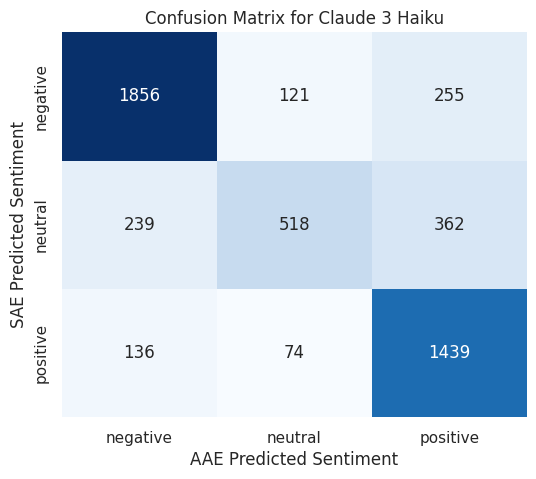


Examples where SAE sentiment is 'positive' but AAE sentiment is 'negative':
SAE Text: Funny statistic: Twitter activity is down 40% on legal holidays when government offices are shut down. Wow! Says a lot about what y'all do all day!
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: Funny Statistic....Twitter activity is down 40% on Legal Holidays when Gov offices are shut down..WOW! Says alot about what yall do all day!
--------------------------------------------------------------------------------
SAE Text: I need to cheer up because he's in a better place and people are blaming honey cocaine.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: @GritzN_Gravy right I need to cheer up because he's in a better place and people blaming honey cocaine
--------------------------------------------------------------------------------
SAE Text: Word of advice, if it's really cold, don't let anyone use your jacket trying to be a gentleman. You're going to get the flu.
SAE Sent

/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_to_neg = mismatches[
/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_to_pos = mismatches[


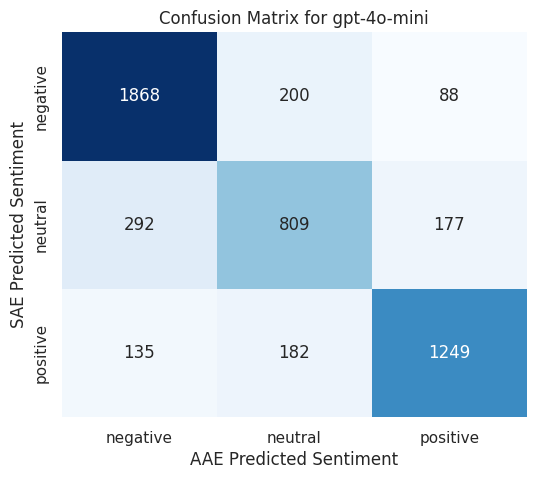

/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_to_neg = mismatches[
/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_to_pos = mismatches[



Examples where SAE sentiment is 'positive' but AAE sentiment is 'negative':
SAE Text: Relationships are what you make of them, so don't be so difficult about things and relationships will last longer.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: Relationships r wut u make it so dont be such a bitch about thing and relationships will last longer.
--------------------------------------------------------------------------------
SAE Text: Where is Jayer @Tiera_Nichole with her goofy self? I saw her begging for change in the middle of the Grand Avenue Mall the other day, haha.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: wheres is the jayer @Tiera_Nichole at with her goofy ass i saw her begging for change in the middle of the grand ave mall the other day ha
--------------------------------------------------------------------------------
SAE Text: I go hard for my squad.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: OBN I go hard fa my squad SQUADDDD

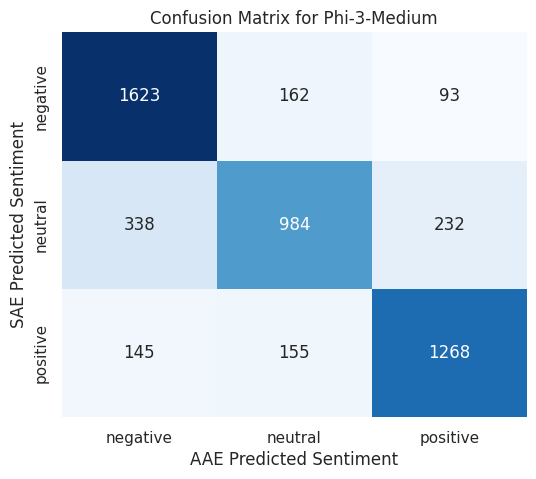

/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_to_neg = mismatches[
/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_to_pos = mismatches[



Examples where SAE sentiment is 'positive' but AAE sentiment is 'negative':
SAE Text: Relationships are what you make of them, so don't be so difficult about things, and relationships will last longer.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: Relationships r wut u make it so dont be such a bitch about thing and relationships will last longer.
--------------------------------------------------------------------------------
SAE Text: @LoVEme_ai I love you, laugh out loud. I am after class, but finally texting you now because I just got slick pissed.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: @LoVEme_ai I love yu lol i am after class..bt fina txt yu now cus I jus gt slick pissed.  .
--------------------------------------------------------------------------------
SAE Text: Laughing out loud, Lelani is not going to ruin my good mood with her foolish behavior, @Aha_LadyBug.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: Lol  ,  Lelani Is NOT Fin

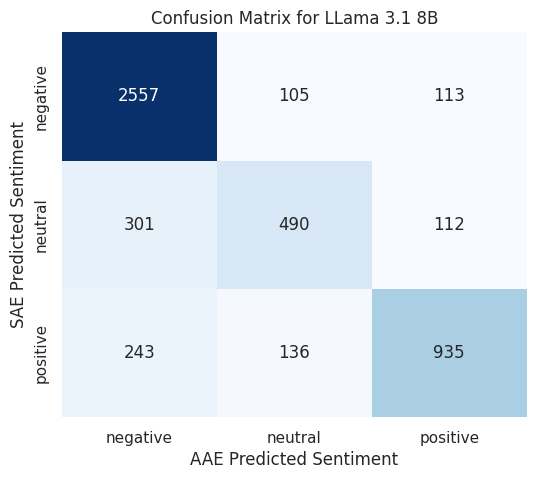

/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_to_neg = mismatches[
/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_to_pos = mismatches[



Examples where SAE sentiment is 'positive' but AAE sentiment is 'negative':
SAE Text: I strive for the gold, and pick my own path. I'll move bricks, break them if I have to, and pitch the whole load.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: I strive for da gold...  And pic my own shit. Move bricks ill break and go pitch da whole load
--------------------------------------------------------------------------------
SAE Text: Relationships are what you make them, so don't be so difficult about things and relationships will last longer.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: Relationships r wut u make it so dont be such a bitch about thing and relationships will last longer.
--------------------------------------------------------------------------------
SAE Text: @melvinwjr is hilarious, this guy changed his name to his birthplace name, I'm dying laughing.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: @melvinwjr is too funny this nigga c

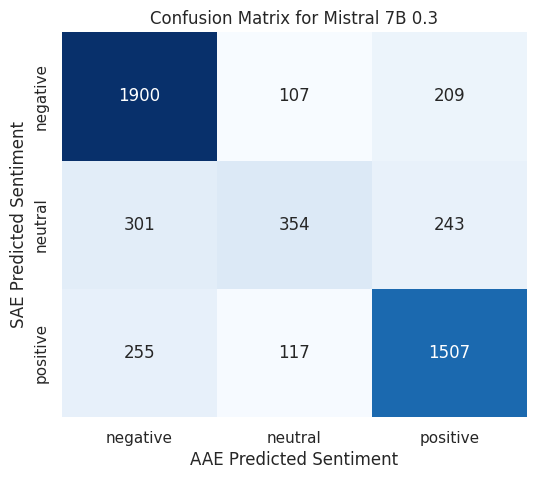


Examples where SAE sentiment is 'positive' but AAE sentiment is 'negative':
SAE Text:  You know I appreciate you, tough guy. (Smile) You're my friend, too.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: @JERRI_NoTom Stfu  .  You Know I Fwu 103 TouGh  ( : You MY Nigga Foo '  .
--------------------------------------------------------------------------------
SAE Text:  I adore my team. We're the ones who earn the money. Forget about the trendy stuff.
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: I Love My Team  ,  We All That Get Money Shit . Fucc That Hot Shit  .
--------------------------------------------------------------------------------
SAE Text:  I will not sleep until she wakes up and calls me. Until then, I will stay awake. #teamupallnight!!!
SAE Sentiment: positive, AAE Sentiment: negative
AAE Text: Not goin to sleep til she wake dat ass up and call me so until then..... #teamupalldamnnight!!!
-----------------------------------------------------------

/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:95: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pos_to_neg = mismatches[
/local/home/furquanh/tmp/ipykernel_1427778/112507068.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_to_pos = mismatches[


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Mapping of model names to the desired labels
model_labels = {
    'claude': 'Claude 3 Haiku',
    'gpt': 'gpt-4o-mini',
    'phi': 'Phi-3-Medium',
    'llama': 'LLama 3.1 8B',
    'mistral': 'Mistral 7B 0.3'
}

# Function to standardize sentiment labels
def standardize_label(label):
    label = str(label).lower()
    if label in ['positive', 'pos', '1', '1.0']:
        return 'positive'
    elif label in ['negative', 'neg', '-1', '-1.0']:
        return 'negative'
    elif label in ['neutral', 'neu', '0', '0.0']:
        return 'neutral'
    else:
        return label  # Return as is if not matched

for model in models:
    print(f"\nProcessing model: {model_labels.get(model, model.capitalize())}")
    
    # Get the AAE and SAE DataFrames for the model
    try:
        aae_df = globals()[f'{model}_aae']
        sae_df = globals()[f'{model}_sae']
    except KeyError as e:
        print(f"DataFrame for model {model} not found: {e}")
        continue
    
    # Reset indices to ensure alignment
    aae_df = aae_df.reset_index(drop=True)
    sae_df = sae_df.reset_index(drop=True)
    
    # Ensure that the number of rows match
    if len(aae_df) != len(sae_df):
        print(f"Number of rows do not match for model {model}")
        min_len = min(len(aae_df), len(sae_df))
        aae_df = aae_df.iloc[:min_len]
        sae_df = sae_df.iloc[:min_len]
    
    # Extract the sentiment labels
    # For AAE, the column is 'sentiment'
    # For SAE, the column is 'sae_labels'
    if 'sentiment' not in aae_df.columns:
        print(f"'sentiment' column not found in {model}_aae")
        continue
    if 'sae_labels' not in sae_df.columns:
        print(f"'sae_labels' column not found in {model}_sae")
        continue
    
    aae_sentiments = aae_df['sentiment'].apply(standardize_label)
    sae_sentiments = sae_df['sae_labels'].apply(standardize_label)
    
    # Combine into a DataFrame and drop NaNs
    sentiments_df = pd.DataFrame({
        'AAE Sentiment': aae_sentiments, 
        'SAE Sentiment': sae_sentiments,
        'AAE Text': aae_df['text'] if 'text' in aae_df.columns else aae_df['standard_american_english'],
        'SAE Text': sae_df['standard_american_english']
    }).dropna()
    
    total_samples = len(sentiments_df)
    if total_samples == 0:
        print(f"No valid sentiment pairs for model {model}")
        continue
    
    # Calculate confusion matrix
    labels = ['negative', 'neutral', 'positive']
    cm = confusion_matrix(sentiments_df['SAE Sentiment'], sentiments_df['AAE Sentiment'], labels=labels)
    
    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {model_labels.get(model, model.capitalize())}")
    plt.xlabel('AAE Predicted Sentiment')
    plt.ylabel('SAE Predicted Sentiment')
    plt.show()
    
    # Find mismatches
    mismatches = sentiments_df[sentiments_df['AAE Sentiment'] != sentiments_df['SAE Sentiment']]
    
    # Find instances where positive turned negative and negative turned positive
    pos_to_neg = mismatches[
        (sentiments_df['SAE Sentiment'] == 'positive') & 
        (sentiments_df['AAE Sentiment'] == 'negative')
    ]
    neg_to_pos = mismatches[
        (sentiments_df['SAE Sentiment'] == 'negative') & 
        (sentiments_df['AAE Sentiment'] == 'positive')
    ]
    
    # Print 5 examples of positive turned negative
    print("\nExamples where SAE sentiment is 'positive' but AAE sentiment is 'negative':")
    for idx, row in pos_to_neg.head(5).iterrows():
        print(f"SAE Text: {row['SAE Text']}")
        print(f"SAE Sentiment: {row['SAE Sentiment']}, AAE Sentiment: {row['AAE Sentiment']}")
        print(f"AAE Text: {row['AAE Text']}")
        print("-" * 80)
    
    # Print 5 examples of negative turned positive
    print("\nExamples where SAE sentiment is 'negative' but AAE sentiment is 'positive':")
    for idx, row in neg_to_pos.head(5).iterrows():
        print(f"SAE Text: {row['SAE Text']}")
        print(f"SAE Sentiment: {row['SAE Sentiment']}, AAE Sentiment: {row['AAE Sentiment']}")
        print(f"AAE Text: {row['AAE Text']}")
        print("-" * 80)

## Does translating SAE back to AAE effect the DGIM score?

In [18]:
llama_aae_from_sae.rename(columns={"AAE_from_SAE Sentiment" : "sentiment"}, inplace=True)

In [19]:
mistral_aae_from_sae.rename(columns={"AAE_from_SAE-sentiment" : "sentiment"}, inplace=True)

aae_from_sae columns: Index(['aae_from_sae', 'sentiment'], dtype='object')
DGIM for Claude 3 Haiku: 0.76
aae_from_sae columns: Index(['aae_from_sae', 'sentiment'], dtype='object')
DGIM for gpt-4o-mini: 0.77
aae_from_sae columns: Index(['aae_from_sae', 'sentiment'], dtype='object')
DGIM for Phi-3-Medium: 0.73
aae_from_sae columns: Index(['Unnamed: 0', 'AAE_from_SAE', 'sentiment'], dtype='object')
DGIM for LLama 3.1 8B: 0.73
aae_from_sae columns: Index(['AAE_from_SAE', 'sentiment'], dtype='object')
DGIM for Mistral 7B 0.3: 0.70


/local/home/furquanh/tmp/ipykernel_1427778/3750039439.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='DGIM', data=dgim_df, palette='Set2')


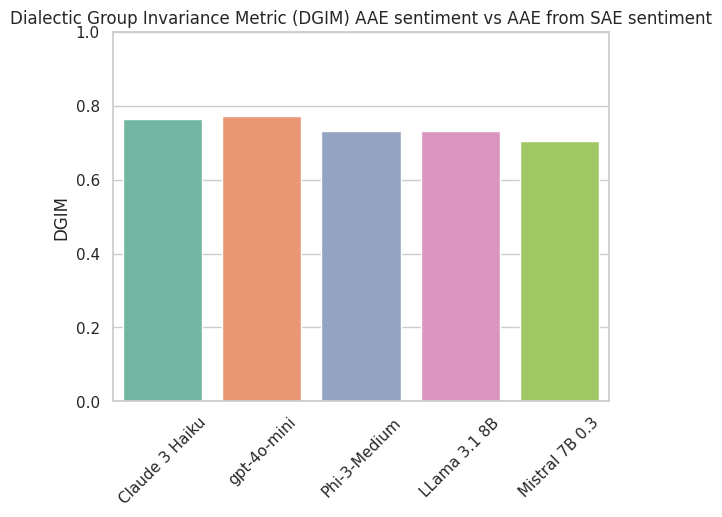

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the datasets are already loaded into DataFrames:
# claude_aae, claude_sae, gpt_aae, gpt_sae, phi_aae, phi_sae, llama_aae, llama_sae, mistral_aae, mistral_sae

# List of model names
models = ['claude', 'gpt', 'phi', 'llama', 'mistral']

# Mapping of model names to the desired labels
model_labels = {
    'claude': 'Claude 3 Haiku',
    'gpt': 'gpt-4o-mini',
    'phi': 'Phi-3-Medium',
    'llama': 'LLama 3.1 8B',
    'mistral': 'Mistral 7B 0.3'
}

# Initialize a dictionary to store DGIM scores
dgim_scores = {}

# Function to standardize sentiment labels
def standardize_label(label):
    label = str(label).lower()
    if label in ['positive', 'pos', '1', '1.0']:
        return 'positive'
    elif label in ['negative', 'neg', '-1', '-1.0']:
        return 'negative'
    elif label in ['neutral', 'neu', '0', '0.0']:
        return 'neutral'
    else:
        return label  # Return as is if not matched

for model in models:
    # Get the AAE and SAE DataFrames for the model
    aae_df = globals()[f'{model}_aae']
    aae_from_sae = globals()[f'{model}_aae_from_sae']
    
    print(f"aae_from_sae columns: {aae_from_sae.columns}")
    
    # Reset indices to ensure alignment
    aae_df = aae_df.reset_index(drop=True)
    aae_from_sae = aae_from_sae.reset_index(drop=True)
    
    # Ensure that the number of rows match
    if len(aae_df) != len(aae_from_sae):
        print(f"Number of rows do not match for model {model}")
        min_len = min(len(aae_df), len(aae_from_sae))
        aae_df = aae_df.iloc[:min_len]
        aae_from_sae = aae_from_sae.iloc[:min_len]

    # Extract the sentiment labels
    # For AAE, the column is 'sentiment'
    # For SAE, the column is 'sae_labels'
    if 'sentiment' not in aae_df.columns:
        print(f"'sentiment' column not found in {model}_aae")
        continue
    if 'sentiment' not in aae_from_sae.columns:
        print(f"'sae_labels' column not found in {model}_sae")
        continue

    aae_sentiments = aae_df['sentiment']
    sae_sentiments = aae_from_sae['sentiment']

    # # Convert labels to standard labels
    # aae_sentiments = aae_sentiments.apply(standardize_label)
    # sae_sentiments = sae_sentiments.apply(standardize_label)

    # Combine into a DataFrame and drop NaNs
    sentiments_df = pd.DataFrame({
        'aae_sentiment': aae_sentiments, 
        'aae_from_sae_sentiment': sae_sentiments
    }).dropna()

    total_samples = len(sentiments_df)
    if total_samples == 0:
        print(f"No valid sentiment pairs for model {model}")
        continue

    # Update sentiments after dropping NaNs
    aae_sentiments = sentiments_df['aae_sentiment']
    aae_from_sae_sentiments = sentiments_df['aae_from_sae_sentiment']

    # Calculate the number of exact matches
    num_matches = (aae_sentiments == aae_from_sae_sentiments).sum()
    dgim = num_matches / total_samples

    # Store the DGIM for the model with the new label
    model_label = model_labels.get(model, model.capitalize())
    dgim_scores[model_label] = dgim

    print(f"DGIM for {model_label}: {dgim:.2f}")

# Create a DataFrame for plotting
dgim_df = pd.DataFrame(list(dgim_scores.items()), columns=['Model', 'DGIM'])

# Plot the bar plot using seaborn
sns.set_theme(style="whitegrid")
sns.barplot(x='Model', y='DGIM', data=dgim_df, palette='Set2')

plt.title('Dialectic Group Invariance Metric (DGIM) AAE sentiment vs AAE from SAE sentiment')
plt.ylabel('DGIM')
plt.ylim(0, 1)  # Since DGIM is a proportion between 0 and 1
plt.xlabel('')  # Optionally remove x-axis label if desired
plt.xticks(rotation=45)  # Rotate x-labels if they are too long

plt.show()

## Let's look at the embedding space within the three open source models